In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, average_precision_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE, SMOTE

ImportError: cannot import name 'six' from 'sklearn.externals' (c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\externals\__init__.py)

In [ ]:
import pandas as pd

# Update the path based on where you have the file in your Google Drive
df = pd.read_csv("D:/Swinburne/Sem 4/Technology Application Project/default/CLient_Data.csv")
# Display the first few rows
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [ ]:
import shap

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Example of outlier removal in LIMIT_BAL using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df['LIMIT_BAL']))
df = df[z_scores < 3]  # Threshold is 3 standard deviations

In [ ]:
# Example of outlier removal in LIMIT_BAL using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df['LIMIT_BAL']))
df = df[z_scores < 3]  # Threshold is 3 standard deviations

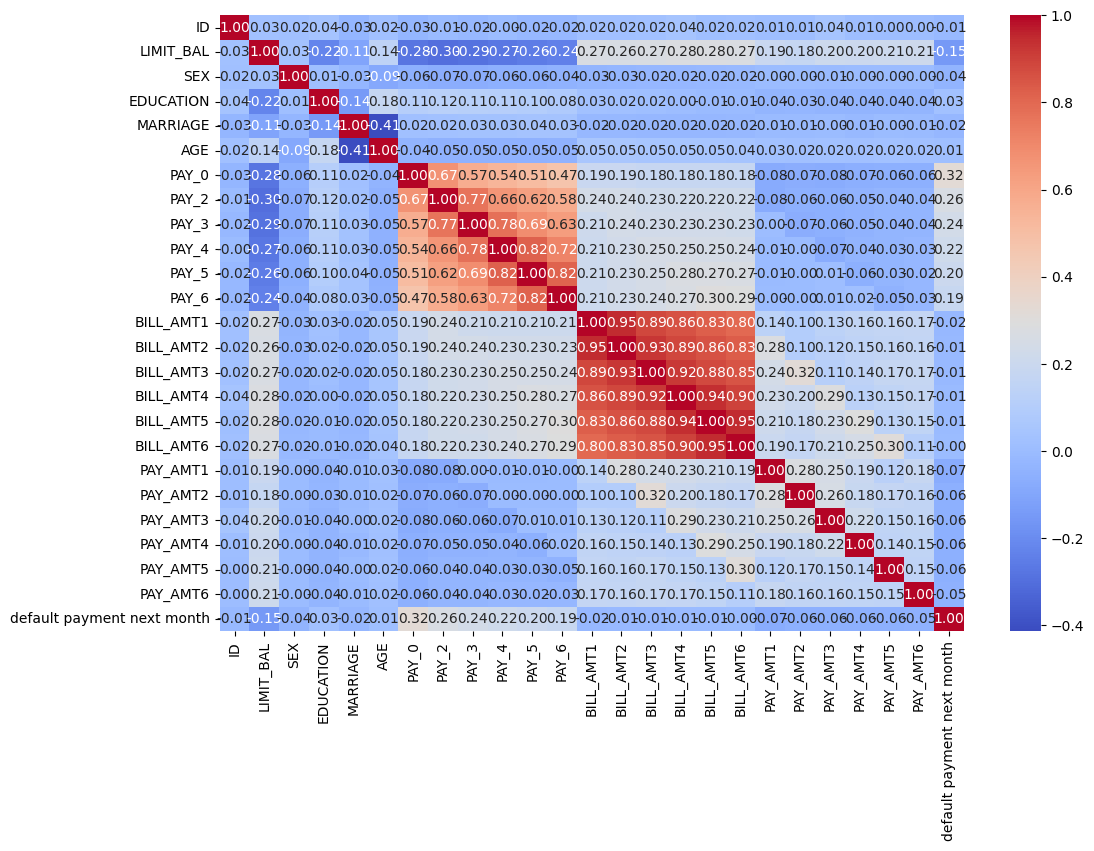

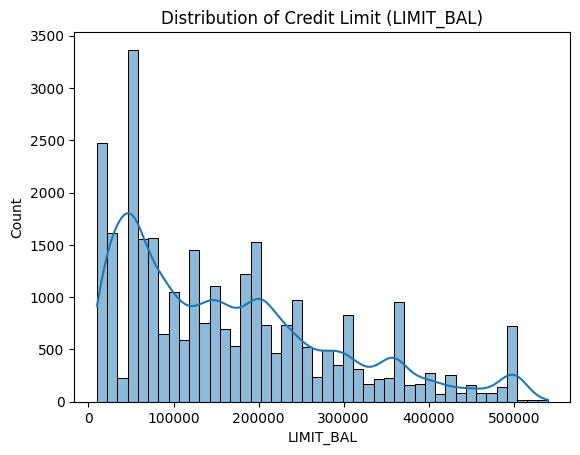

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# Distribution of LIMIT_BAL
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.title("Distribution of Credit Limit (LIMIT_BAL)")
plt.show()

In [ ]:
# Assume 'default payment next month' is the target column in your dataset, where 1 indicates fraud and 0 indicates non-fraud.
no_fraud_count = df[df['default payment next month'] == 0].shape[0]
fraud_count = df[df['default payment next month'] == 1].shape[0]

# Calculate the proportions
total_count = no_fraud_count + fraud_count
no_fraud_proportion = no_fraud_count / total_count
fraud_proportion = fraud_count / total_count

# Display the counts and proportions
print(f"Non-Fraud Count: {no_fraud_count}")
print(f"Fraud Count: {fraud_count}")
print(f"Non-Fraud Proportion: {no_fraud_proportion:.2%}")
print(f"Fraud Proportion: {fraud_proportion:.2%}")

Non-Fraud Count: 23231
Fraud Count: 6618
Non-Fraud Proportion: 77.83%
Fraud Proportion: 22.17%


C:\Users\DELL\AppData\Local\Temp\ipykernel_6884\2530517538.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_labels, y=fraud_counts, palette='viridis')


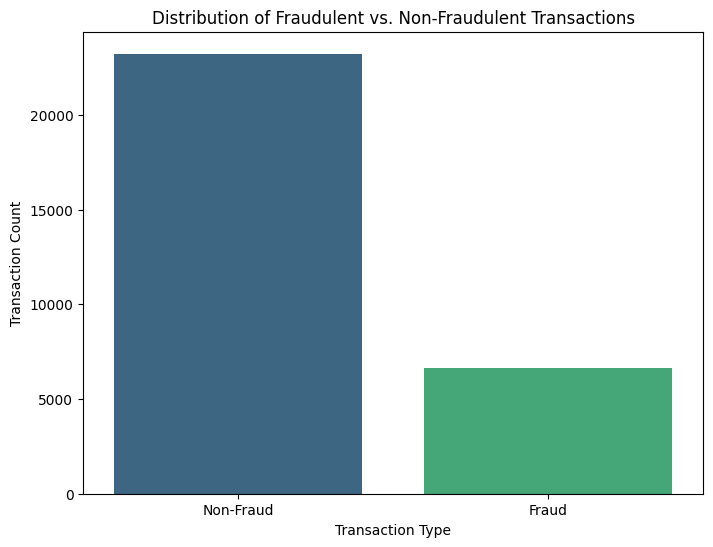

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
# Assuming 'default payment next month' column indicates fraud status (1 = fraud, 0 = non-fraud)
# and 'trans_date' indicates transaction date

# Bar Chart: Distribution of Fraud vs Non-Fraud Transactions
fraud_counts = df['default payment next month'].value_counts()
fraud_labels = ['Non-Fraud', 'Fraud']

plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_labels, y=fraud_counts, palette='viridis')
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.show()

# 1. Feature Engineering & Model Implement

In [ ]:
# Average payment amount across billing cycles
df['avg_bill_amt'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

# Total payment amount across billing cycles
df['total_bill_amt'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)

# Average payment amount made
df['avg_pay_amt'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

# Total payment amount made
df['total_pay_amt'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

In [ ]:
# Utilization for each billing month
for i in range(1, 7):
    df[f'credit_utilization_{i}'] = df[f'BILL_AMT{i}'] / df['LIMIT_BAL']

# Average credit utilization across billing cycles
df['avg_credit_utilization'] = df[[f'credit_utilization_{i}' for i in range(1, 7)]].mean(axis=1)

In [ ]:
# Calculate delayed payment frequency
df['total_late_payments'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x > 0).sum(), axis=1)

# Average delay in payments
df['avg_delay'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

# Count of severe delays (over 2 months)
df['severe_delays'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x >= 2).sum(), axis=1)


In [ ]:
# Trend in bill amounts (difference between consecutive billing cycles)
df['bill_amt_trend'] = df['BILL_AMT1'] - df['BILL_AMT6']

# Trend in payment amounts (difference between first and last payments)
df['pay_amt_trend'] = df['PAY_AMT1'] - df['PAY_AMT6']

# Difference between payment and bill amounts to measure ability to cover bills
df['pay_vs_bill_trend'] = df['total_pay_amt'] - df['total_bill_amt']

In [ ]:
# Average Delay in Payments
df['avg_delay'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

# Total Number of Defaults
df['total_defaults'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x > 0).sum(), axis=1)

# Payment Trends (Example: Ratio of last to first payment amount)
df['payment_trend'] = df['PAY_AMT6'] / (df['PAY_AMT1'] + 1)  # Adding 1 to avoid division by zero

In [ ]:
# Ratio of average payment to credit limit
df['payment_limit_ratio'] = df['avg_pay_amt'] / df['LIMIT_BAL']

# Ratio of total payments to total bills
df['pay_bill_ratio'] = df['total_pay_amt'] / (df['total_bill_amt'] + 1)  # +1 to avoid division by zero

# Ratio of average delay to age (normalized delay)
df['delay_age_ratio'] = df['avg_delay'] / (df['AGE'] + 1)

In [ ]:
# Difference between credit limit and most recent bill amount
df['limit_vs_recent_bill'] = df['LIMIT_BAL'] - df['BILL_AMT1']

# Difference between most recent bill and previous bill
df['recent_bill_difference'] = df['BILL_AMT1'] - df['BILL_AMT2']

# Difference between most recent payment and previous payment
df['recent_payment_difference'] = df['PAY_AMT1'] - df['PAY_AMT2']

In [ ]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

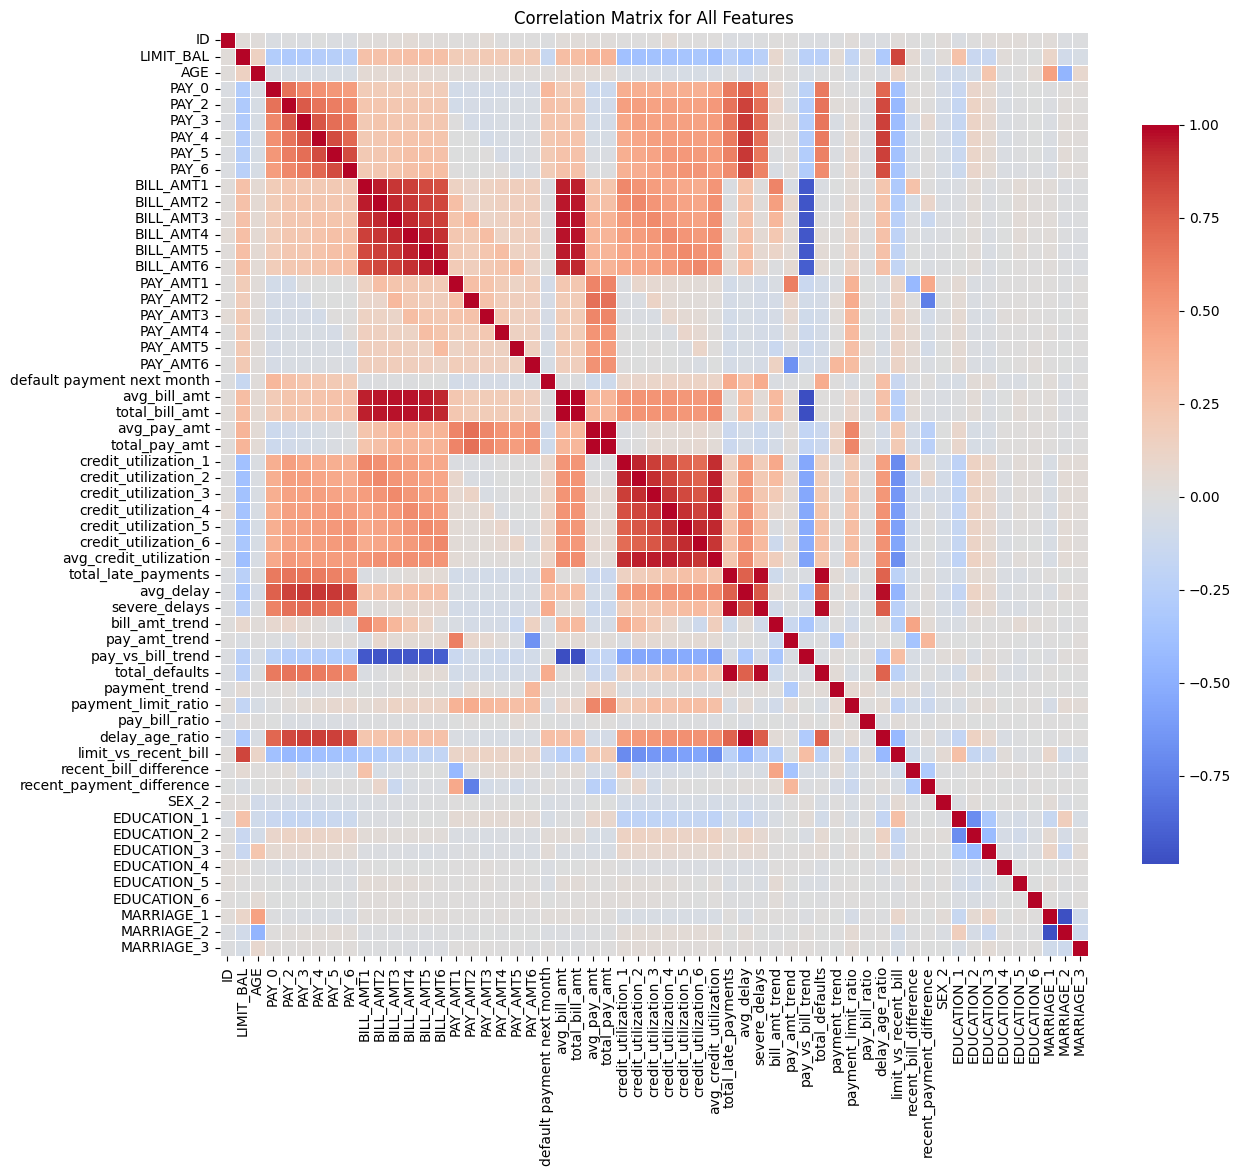

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix for All Features')
plt.show()

In [ ]:
correlation_matrix

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,1.000000,0.026295,0.018691,-0.030202,-0.010653,-0.018251,-0.002239,-0.021559,-0.019943,0.019030,...,0.018927,-0.025492,0.002459,0.017113,0.022976,0.027614,0.009065,0.027164,-0.024262,-0.015273
LIMIT_BAL,0.026295,1.000000,0.142166,-0.276190,-0.302872,-0.292306,-0.272952,-0.255147,-0.239949,0.269556,...,0.027930,0.260895,-0.147897,-0.141578,0.026344,0.000198,-0.005567,0.105560,-0.092859,-0.055779
AGE,0.018691,0.142166,1.000000,-0.039171,-0.050207,-0.053216,-0.049714,-0.053951,-0.048931,0.052062,...,-0.090213,-0.100992,-0.077621,0.231762,-0.011104,0.000728,0.037856,0.449410,-0.466702,0.083190
PAY_0,-0.030202,-0.276190,-0.039171,1.000000,0.671621,0.573612,0.538411,0.509059,0.474035,0.189495,...,-0.058143,-0.142654,0.099205,0.058538,-0.028092,-0.008613,-0.005933,-0.016514,0.013391,0.017261
PAY_2,-0.010653,-0.302872,-0.050207,0.671621,1.000000,0.766161,0.661708,0.622520,0.575060,0.237797,...,-0.071083,-0.169572,0.122817,0.064204,-0.034557,-0.013441,-0.006259,-0.022703,0.020475,0.011569
PAY_3,-0.018251,-0.292306,-0.053216,0.573612,0.766161,1.000000,0.777250,0.686717,0.632441,0.210572,...,-0.066162,-0.160710,0.116277,0.062039,-0.032390,-0.016640,-0.007171,-0.030744,0.027365,0.016570
PAY_4,-0.002239,-0.272952,-0.049714,0.538411,0.661708,0.777250,1.000000,0.819846,0.716357,0.206308,...,-0.060267,-0.152659,0.110655,0.058085,-0.032859,-0.012516,-0.006799,-0.030376,0.027176,0.017399
PAY_5,-0.021559,-0.255147,-0.053951,0.509059,0.622520,0.686717,0.819846,1.000000,0.816884,0.209008,...,-0.055197,-0.139153,0.103777,0.049212,-0.029467,-0.010230,-0.008922,-0.034128,0.032167,0.011327
PAY_6,-0.019943,-0.239949,-0.048931,0.474035,0.575060,0.632441,0.716357,0.816884,1.000000,0.210128,...,-0.044295,-0.125281,0.098702,0.040502,-0.025384,-0.019214,-0.012839,-0.032068,0.029069,0.016225
BILL_AMT1,0.019030,0.269556,0.052062,0.189495,0.237797,0.210572,0.206308,0.209008,0.210128,1.000000,...,-0.033279,-0.028367,0.034842,-0.022085,0.001267,0.039175,0.018207,0.023675,-0.019872,-0.010767


In [ ]:
# Separate features and target
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Get feature importances
xgb_feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("XGBoost Feature Importances:")
print(xgb_feature_importances)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:44:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Feature Importances:
severe_delays                0.210079
PAY_0                        0.154399
total_late_payments          0.146881
avg_bill_amt                 0.017442
EDUCATION_6                  0.014591
limit_vs_recent_bill         0.014426
avg_pay_amt                  0.014151
PAY_2                        0.012094
BILL_AMT1                    0.011955
EDUCATION_5                  0.011722
avg_credit_utilization       0.011395
MARRIAGE_2                   0.011227
pay_vs_bill_trend            0.011139
credit_utilization_2         0.011044
PAY_AMT2                     0.010780
PAY_AMT1                     0.010708
pay_bill_ratio               0.010215
BILL_AMT4                    0.010029
PAY_3                        0.009930
delay_age_ratio              0.009881
credit_utilization_3         0.009862
PAY_AMT3                     0.009714
BILL_AMT5                    0.009712
recent_bill_difference       0.009687
credit_utilization_1         0.009628
BILL_AMT2            

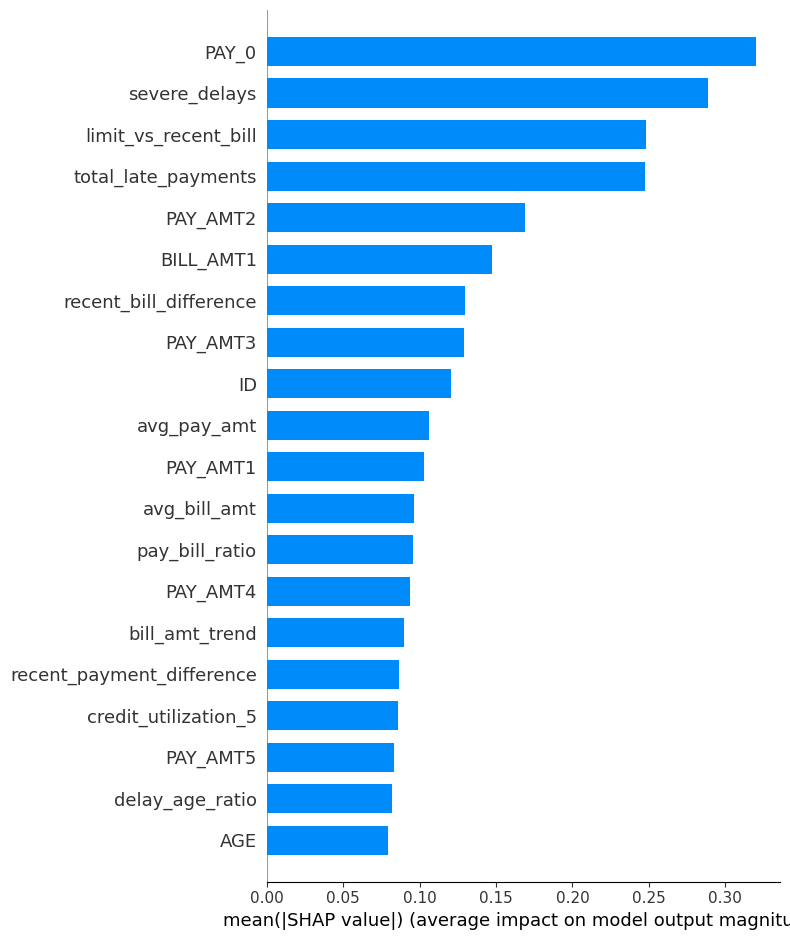

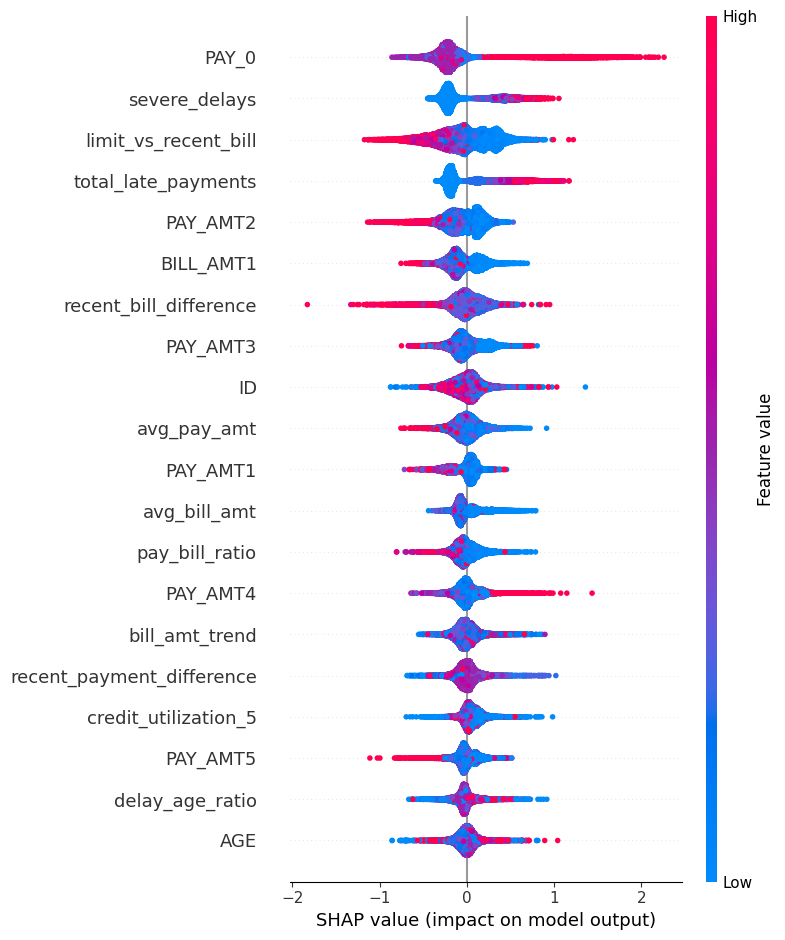

In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Summary plot of SHAP values to show feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Detailed SHAP summary plot (to see the effect of each feature on predictions)
shap.summary_plot(shap_values, X_train)

In [ ]:
shap_importances = pd.DataFrame(list(zip(X.columns, shap_values.mean(0).tolist())), columns=["Feature", "Mean SHAP Value"])
shap_importances = shap_importances.sort_values(by="Mean SHAP Value", ascending=False)

print("SHAP Feature Importances:")
print(shap_importances)

SHAP Feature Importances:
                      Feature  Mean SHAP Value
29       credit_utilization_5         0.057496
31     avg_credit_utilization         0.031280
6                       PAY_4         0.011696
39              payment_trend         0.009023
12                  BILL_AMT4         0.007617
27       credit_utilization_3         0.007256
18                   PAY_AMT4         0.003716
33                  avg_delay         0.002742
47                EDUCATION_1         0.001255
54                 MARRIAGE_2         0.000276
55                 MARRIAGE_3         0.000151
22             total_bill_amt         0.000000
38             total_defaults         0.000000
24              total_pay_amt         0.000000
52                EDUCATION_6        -0.000284
49                EDUCATION_3        -0.000340
45  recent_payment_difference        -0.000462
48                EDUCATION_2        -0.001185
50                EDUCATION_4        -0.001216
46                      SEX_2     

In [ ]:
# Step 4: Compare XGBoost Feature Importances and SHAP Feature Importances
# Identify the best feature based on both methods

best_feature_xgb = xgb_feature_importances.idxmax()
best_feature_shap = shap_importances['Feature'].iloc[0]

print(f"Best Feature according to XGBoost: {best_feature_xgb}")
print(f"Best Feature according to SHAP: {best_feature_shap}")

Best Feature according to XGBoost: severe_delays
Best Feature according to SHAP: credit_utilization_5


Top 5 Features according to XGBoost:
severe_delays          0.210079
PAY_0                  0.154399
total_late_payments    0.146881
avg_bill_amt           0.017442
EDUCATION_6            0.014591
dtype: float32
Top 5 Features according to SHAP:
                   Feature  Mean SHAP Value
29    credit_utilization_5         0.057496
31  avg_credit_utilization         0.031280
6                    PAY_4         0.011696
39           payment_trend         0.009023
12               BILL_AMT4         0.007617


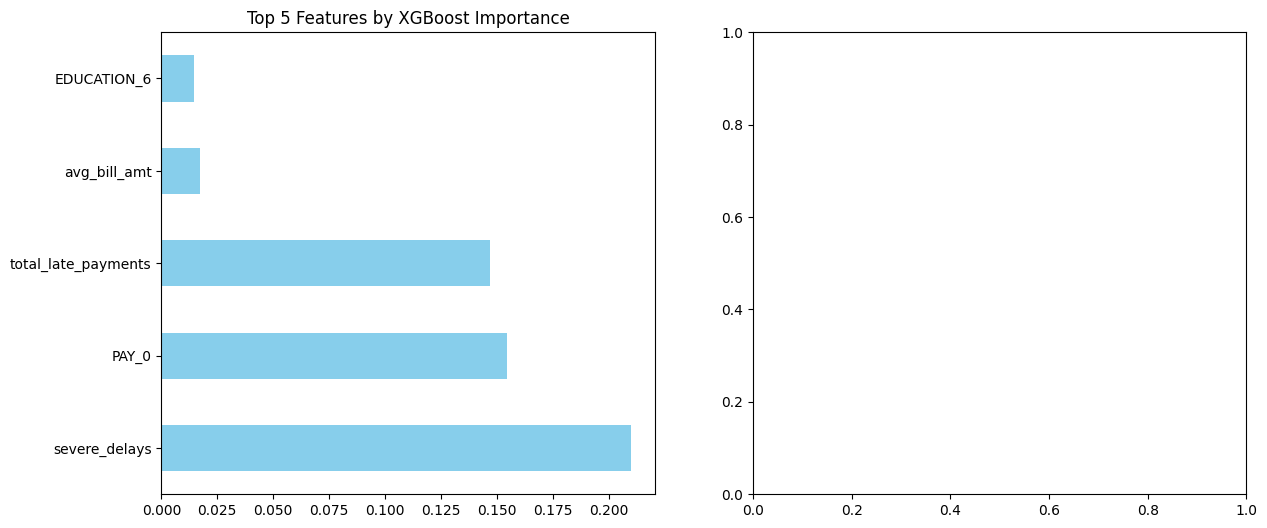

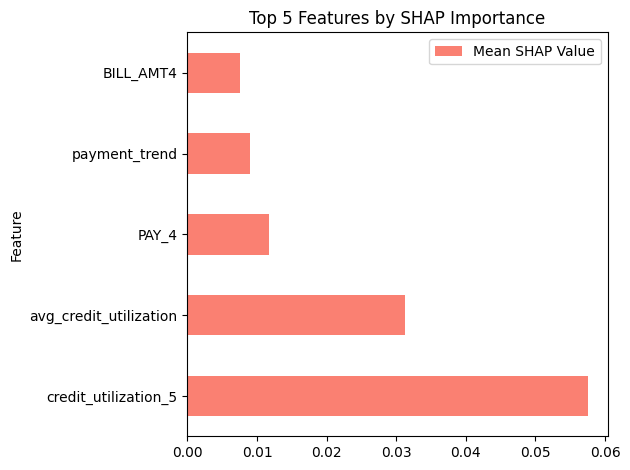

In [ ]:
# Top 5 features according to XGBoost (highest importance)
top_5_features_xgb = xgb_feature_importances.head(5)
print("Top 5 Features according to XGBoost:")
print(top_5_features_xgb)

# Top 5 features according to SHAP (highest mean SHAP value)
top_5_features_shap = shap_importances.head(5)
print("Top 5 Features according to SHAP:")
print(top_5_features_shap)

# Step 5: Plot the top 5 features from XGBoost and SHAP for comparison
plt.figure(figsize=(14, 6))

# Plot XGBoost Top 5 Features
plt.subplot(1, 2, 1)
top_5_features_xgb.plot(kind='barh', color='skyblue')
plt.title('Top 5 Features by XGBoost Importance')

# Plot SHAP Top 5 Features
plt.subplot(1, 2, 2)
top_5_features_shap.plot(kind='barh', x='Feature', y='Mean SHAP Value', color='salmon')
plt.title('Top 5 Features by SHAP Importance')

plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(columns=['default payment next month'])  # Remove the target column from features
y = df['default payment next month']

In [ ]:
X.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,True,False,True,False,False,False,False,True,False,False
1,2,120000,26,-1,2,0,0,0,2,2682,...,True,False,True,False,False,False,False,False,True,False
2,3,90000,34,0,0,0,0,0,0,29239,...,True,False,True,False,False,False,False,False,True,False
3,4,50000,37,0,0,0,0,0,0,46990,...,True,False,True,False,False,False,False,True,False,False
4,5,50000,57,-1,0,-1,0,0,0,8617,...,False,False,True,False,False,False,False,True,False,False


In [ ]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

# Other Strategies

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Optional: Scale the features if necessary (important for some models like XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Over-sample the minority class using SMOTE and under-sample the majority class using RandomUnderSampler
over = SMOTE(sampling_strategy=0.5)  # 50% more minority class
under = RandomUnderSampler(sampling_strategy=0.5)  # 50% less majority class

# Create a pipeline to first over-sample, then under-sample
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Resample the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train_scaled, y_train)

In [ ]:
# Compute scale_pos_weight: ratio of negative class (0) to positive class (1)
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Create XGBoost classifier with class weight adjustment
clf = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,        # Maximum depth of a tree
    learning_rate=0.1,  # Learning rate
    random_state=42,    # For reproducibility
    scale_pos_weight=scale_pos_weight  # Adjust for class imbalance
)

In [ ]:
# Define a parameter grid for tuning XGBoost
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model
best_clf = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
# Fit the model
best_clf.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict the labels on the test set
y_pred = best_clf.predict(X_test_scaled)

# Predict the probability (for ROC AUC or PR AUC)
y_prob = best_clf.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      6970
           1       0.50      0.48      0.49      1985

    accuracy                           0.78      8955
   macro avg       0.68      0.67      0.68      8955
weighted avg       0.78      0.78      0.78      8955



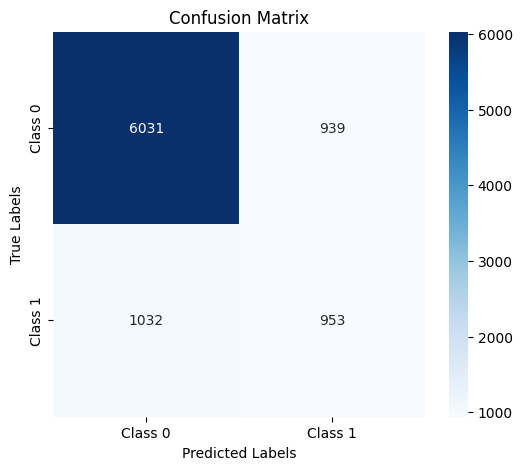

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap for better readability
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc:.2f}")

# PR AUC Score
pr_auc = average_precision_score(y_test, y_prob)
print(f"PR AUC: {pr_auc:.2f}")

ROC AUC: 0.75
PR AUC: 0.51


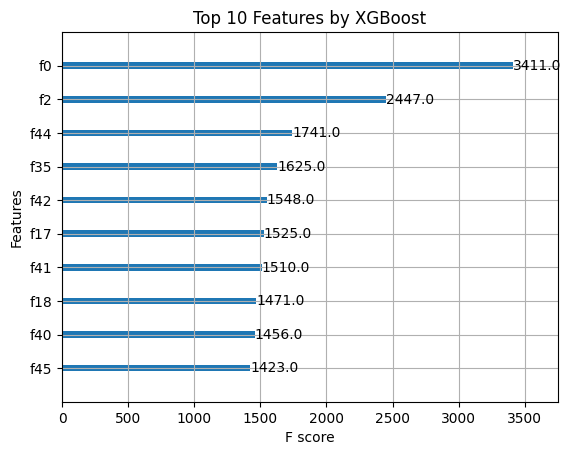

In [ ]:
# Plot feature importance
xgb.plot_importance(best_clf, importance_type='weight', max_num_features=10)
plt.title("Top 10 Features by XGBoost")
plt.show()

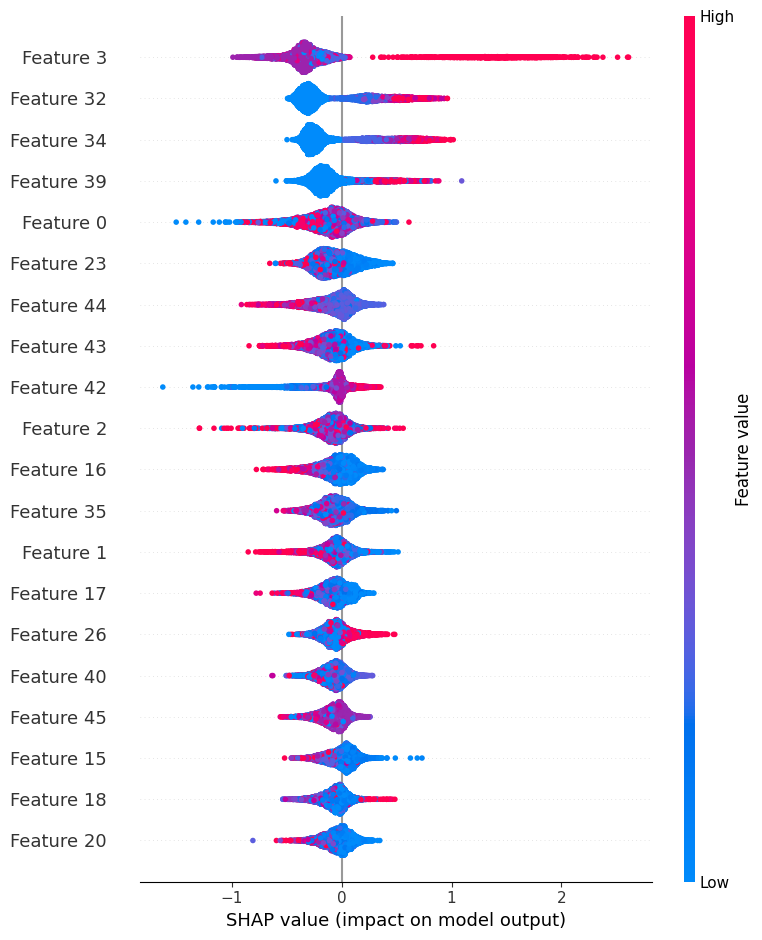

In [ ]:
# Create SHAP explainer for XGBoost model
explainer = shap.TreeExplainer(best_clf)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP values (summary plot)
shap.summary_plot(shap_values, X_test_scaled)

# Best result - 94%

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Train the Base Classifier
base_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
base_model.fit(X_train_scaled, y_train)

# Get predictions from the base classifier
y_pred_base = base_model.predict(X_test_scaled)

# Evaluate the base classifier
print("Base Model Classification Report:")
print(classification_report(y_test, y_pred_base))

# Step 2: Identify False Positives
false_positives_idx = np.where((y_pred_base == 1) & (y_test == 0))[0]
X_test_false_positives = X_test_scaled[false_positives_idx]
y_test_false_positives = y_test.iloc[false_positives_idx]

# Step 3: Train a Secondary Classifier
secondary_model = XGBClassifier(random_state=42)
secondary_model.fit(X_train_scaled, y_train)

# Re-classify the false positives
y_pred_secondary = secondary_model.predict(X_test_false_positives)

# Step 4: Combine Predictions
final_predictions = y_pred_base.copy()
final_predictions[false_positives_idx] = y_pred_secondary

# Evaluate the Cascade Model
print("Cascade Model Classification Report:")
print(classification_report(y_test, final_predictions))


Base Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      6970
           1       0.47      0.53      0.50      1985

    accuracy                           0.76      8955
   macro avg       0.67      0.68      0.67      8955
weighted avg       0.78      0.76      0.77      8955

Cascade Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6970
           1       0.73      0.53      0.62      1985

    accuracy                           0.85      8955
   macro avg       0.80      0.74      0.76      8955
weighted avg       0.84      0.85      0.84      8955



### a. Synthetic Data Generation (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train your XGBoost model on the resampled data
best_xgb_model.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### b. Undersampling Majority Class

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Train your XGBoost model on the undersampled data
best_xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Hyperparameter grid
param_dist = {
    'learning_rate': [0.01, 0.1, 0.05, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'scale_pos_weight': [1, 3, 5]  # Add scale_pos_weight to balance classes
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(XGBClassifier(), param_distributions=param_dist, n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best hyperparameters found
print(random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [ ]:
# Step 4: Combine Predictions
final_predictions = y_pred_base.copy()
final_predictions[false_positives_idx] = y_pred_secondary

# Evaluate the Cascade Model
print("Cascade Model Classification Report:")
print(classification_report(y_test, final_predictions))

NameError: name 'y_pred_base' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29849 entries, 0 to 29999
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          29849 non-null  int64  
 1   LIMIT_BAL                   29849 non-null  int64  
 2   AGE                         29849 non-null  int64  
 3   PAY_0                       29849 non-null  int64  
 4   PAY_2                       29849 non-null  int64  
 5   PAY_3                       29849 non-null  int64  
 6   PAY_4                       29849 non-null  int64  
 7   PAY_5                       29849 non-null  int64  
 8   PAY_6                       29849 non-null  int64  
 9   BILL_AMT1                   29849 non-null  int64  
 10  BILL_AMT2                   29849 non-null  int64  
 11  BILL_AMT3                   29849 non-null  int64  
 12  BILL_AMT4                   29849 non-null  int64  
 13  BILL_AMT5                   29849 no

## Perform PCA

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retaining 95% of the variance
X_pca = pca.fit_transform(X_scaled)

print(f'Original shape: {X_scaled.shape}')
print(f'Reduced shape: {X_pca.shape}')

Original shape: (29849, 56)
Reduced shape: (29849, 25)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Initialize XGBoost model
xgb = XGBClassifier(random_state=42, scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]))

# Train the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

In [ ]:
# Evaluate the model
print("XGBoost Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

XGBoost Model Evaluation
Accuracy: 0.7594
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      6970
           1       0.46      0.51      0.49      1985

    accuracy                           0.76      8955
   macro avg       0.66      0.67      0.66      8955
weighted avg       0.77      0.76      0.76      8955

Confusion Matrix:
[[5779 1191]
 [ 964 1021]]


### 1. Using SMOTE for Over-sampling the Minority Class

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train an XGBoost model on the SMOTE balanced data
xgb_smote = XGBClassifier(random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_smote = xgb_smote.predict(X_test)

# Evaluate the model
print("XGBoost with SMOTE Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_smote))

XGBoost with SMOTE Model Evaluation
Accuracy: 0.7322
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      6970
           1       0.42      0.54      0.47      1985

    accuracy                           0.73      8955
   macro avg       0.64      0.66      0.65      8955
weighted avg       0.76      0.73      0.74      8955



### 2. Random Under-sampling the Majority Class


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Under-sampling to balance the dataset
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# Train an XGBoost model on the under-sampled data
xgb_under = XGBClassifier(random_state=42)
xgb_under.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred_under = xgb_under.predict(X_test)

# Evaluate the model
print("XGBoost with Random Under-sampling Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_under):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_under))

XGBoost with Random Under-sampling Model Evaluation
Accuracy: 0.6870
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      6970
           1       0.38      0.64      0.48      1985

    accuracy                           0.69      8955
   macro avg       0.63      0.67      0.63      8955
weighted avg       0.76      0.69      0.71      8955



### 3. Hyperparameter Tuning with Class Imbalance Handling

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, (y_train.value_counts()[0] / y_train.value_counts()[1])]
}

# Initialize RandomizedSearchCV
xgb_search = RandomizedSearchCV(XGBClassifier(random_state=42), param_grid, n_iter=10, random_state=42, cv=5, n_jobs=-1)

# Fit the model
xgb_search.fit(X_train, y_train)

# Make predictions with the best model
y_pred_tuned = xgb_search.best_estimator_.predict(X_test)

# Evaluate the model
print("XGBoost Hyperparameter Tuning Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned))

XGBoost Hyperparameter Tuning Model Evaluation
Accuracy: 0.8046
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      6970
           1       0.61      0.32      0.42      1985

    accuracy                           0.80      8955
   macro avg       0.72      0.63      0.65      8955
weighted avg       0.78      0.80      0.78      8955



### 4. Ensemble Method: Balanced Random Forest

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Train a BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train, y_train)

# Make predictions
y_pred_brf = brf.predict(X_test)

# Evaluate the model
print("Balanced Random Forest Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_brf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_brf))

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to sile

Balanced Random Forest Model Evaluation
Accuracy: 0.7339
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      6970
           1       0.43      0.62      0.51      1985

    accuracy                           0.73      8955
   macro avg       0.65      0.69      0.66      8955
weighted avg       0.78      0.73      0.75      8955



In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Create and train the XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=(y_train_res.value_counts()[0] / y_train_res.value_counts()[1]))
xgb_model.fit(X_train_res, y_train_res)

# Make predictions and evaluate
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6919
           1       0.53      0.49      0.51      2036

    accuracy                           0.78      8955
   macro avg       0.69      0.68      0.68      8955
weighted avg       0.78      0.78      0.78      8955



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, (y_train.value_counts()[0] / y_train.value_counts()[1])],
    'max_delta_step': [0, 1, 2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0.1, 0.5, 1]
}

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=3, scoring='f1', verbose=1)
grid_search.fit(X_train_res, y_train_res)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Make predictions and evaluate
y_pred_best = best_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 13122 candidates, totalling 39366 fits


KeyboardInterrupt: 

In [ ]:
# Get predicted probabilities
y_pred_prob = best_xgb_model.predict_proba(X_test)[:, 1]

# Adjust the threshold to 0.3 (you can adjust this threshold based on evaluation)
y_pred_adjusted = (y_pred_prob > 0.3).astype(int)

# Evaluate the model with the new threshold
print(classification_report(y_test, y_pred_adjusted))

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Apply Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in skf.split(X_train_res, y_train_res):
    X_train_fold, X_val_fold = X_train_res[train_index], X_train_res[val_index]
    y_train_fold, y_val_fold = y_train_res[train_index], y_train_res[val_index]

    # Train the model on each fold
    best_xgb_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_pred_fold = best_xgb_model.predict(X_val_fold)
    print(f"Fold Classification Report:\n{classification_report(y_val_fold, y_pred_fold)}")

In [ ]:
# Evaluate the final model on the test set
y_pred_final = best_xgb_model.predict(X_test)
print(f"Final Classification Report:\n{classification_report(y_test, y_pred_final)}")

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Model Explainability:

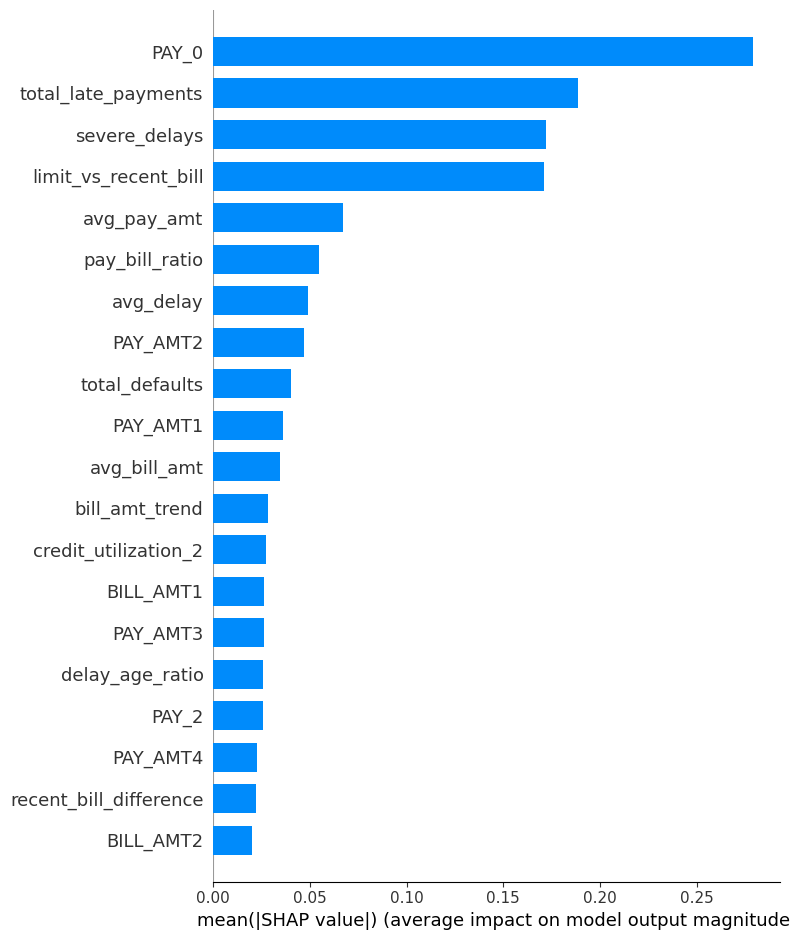

In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer
explainer = shap.TreeExplainer(best_xgb_model)  # Use the trained model

# Calculate SHAP values for the training set
shap_values = explainer.shap_values(X_train)

# Create a summary plot (global explanation)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
# SHAP dependence plot for a specific feature, e.g., 'age'
shap.dependence_plot('age', shap_values, X_test)

ValueError: Could not find feature named: age

In [ ]:
# Select a sample from the test set to explain (for example, the first instance)
sample_index = 0
sample_data = X_test.iloc[sample_index:sample_index+1]

# Calculate SHAP values for this individual prediction
shap_values_individual = explainer.shap_values(sample_data)

# Create a force plot to explain the individual prediction
shap.initjs()  # Initialize JavaScript for interactive plots
shap.force_plot(explainer.expected_value[1], shap_values_individual[1], sample_data)

IndexError: invalid index to scalar variable.